# DATA 정리  


**데이터 정보 정리**
- 'ID' : 회원 번호
- 'Warehouse_block ' : 창고위치 (A,B,C,D,E. 위치로 나뉘어 진다.)  
- 'Mode_of_Shipment' : 배송 방법  
- 'Customer_care_calls' : 고객통화 횟수  
- 'Customer_rating' :  고객 평가  
- 'Cost_of_the_Product' : 제품 가격  
- 'Prior_purchases' : 사전구매  
- 'Product_importance' : 제품 중요도  
- 'Gender' : 성별  
- 'Discount_offered' : 할인 제공  
- 'Weight_in_gms' : 무게  
- 'Reached.on.Time_Y.N' : 제떄 도착했냐? (정답 데이터)  


### .info()
Data columns (total 12 columns):  
Data columns (total 11 columns):


### .columns
'ID', 'Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',  
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',  
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',  
       'Reached.on.Time_Y.N']    
       
       
'ID', 'Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',  
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',  
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'  
       
### 결측치 정리

 3   Customer_care_calls  5423 non-null   float64  
 6   Prior_purchases      6049 non-null   float64  
 9   Discount_offered     3468 non-null   float64  
     Weight_in_gms  
 
 3   Customer_care_calls  3144 non-null   float64  
 6   Prior_purchases      3633 non-null   float64  
 9   Discount_offered     2085 non-null   float64  
     Weight_in_gms  
### 결측치 해결 방안  구상  

 3   Customer_care_calls  5423 non-null   float64  
 고객 전화는 존재하지 않아 0 으로 기재한것으로 추정   
0으로 채울시 0에 대한 모델학습 과정에서 문제 발생 할것으로 추정  
Customer_care_calls 0 에 대한 데이터의 구분이 모호해져 결과 도출 어려울 것  
- 100으로 채우고 
 6   Prior_purchases      6049 non-null   float64  
 ( 0.065160 ) 의 상관 관계로 결과 도출에 영향이 낮지 않음
 이또한 0 으로 채울시 결과도출에 어려움 있을 수 있음
- 101 로 채우고
 9   Discount_offered     3468 non-null   float64  
- 102 로 채우면?


Weight_in_gms  
 ? = 446개  
- 중앙값으로?  

### .shape()


(6999, 12)  
(4000, 11)

# train 컬럼 정리  

### ID  

숫자로 되어있음 1~6999   int64

### 1. Warehouse_block 
dtype=object  
['Warehouse_block '] 띄어쓰기 해야 검색됨 ..  
배열 형태 [A, B, C, D, F]    
== F창고 조회 빈도수 가장 많음  
#### .value_counts().sort_index()

A    1174  
B    1162  
C    1184  
D    1168  
F    2311   
 


### 2. Mode_of_Shipment  
object  
(운송 방법 같음)  
 zk 의 의미 해석 불가  -  그냥 오타 같음  
 ?  처리 어떻게 할지  
 
 **? 의 Reached.on.Time_Y.N 이 1인 개수 **
 373
 373개 의 결측치가 모두 정답이다
 
 
 
 ? 를 제거하고 나서 의 비중  
Ship      0.680652  
Road      0.162391   
Flight    0.156957   


 
  'Reached.on.Time_Y.N' 값이 1인 행의 개수 구하기
count_of_ones = (one_hot_train['Mode_of_Shipment_?'] == 1) & (one_hot_train['Reached.on.Time_Y.N'] == 1)
count = count_of_ones.sum()

  결과 출력
print(f"'Mode_of_Shipment_?' 열에서 'Reached.on.Time_Y.N' 값이 1인 행의 개수: {count}")
 
 99119
- 09_12 Mode_of_Shipment 의 결측치는 고민하지말고 ship 으로 넣던지 100% 로 만들자  


#### .value_counts()  
 Ship        4508 - 선박  
 Road        1075 - 도로  
 Flight      1039 - 항공  
?             373 -  ?  
 Shipzk         2 -  
 Flightzk       1 -  
 Roadzk         1 -  

### 3. Customer_care_calls  
float64  
결측치 있음  
(고객 불평 전화)   
화물이 도착하고나서 전화인지   
도착하기 전에 컴플레인 전화인지 모름    
가장 적은 콜 횟수 - 2  
가장 많은 콜 횟수 - 7  

Prior_purchases 와 상관관계가 꽤 있음  
사전구매하고 연락을 주고받은듯   


#### .describe()  
count    5423.000000  
mean        4.054582  
std         1.131019  
min         2.000000  
25%         3.000000  
50%         4.000000  
75%         5.000000  
max         7.000000  
#### .value_counts()    
4.0    1756  
3.0    1620  
5.0    1147  
6.0     496  
2.0     287  
7.0     117  


### Customer_rating  
int64  
= 5까지는 숫자가 있으나 6 _ 10 까지는 없음
  1_5 로 평점을 먹이려고 한 의도 같음  
  
max 에서 99 는 이상치 99   총 2개  있음 
1~5 제외한 숫자 99 2개가 다임  

고객 평가와 제때 도착했냐의 관계도는 낮음 
  
#### .describe()  
count    6999.000000  
mean        3.023718  
std         2.149861  
min         1.000000   
25%         2.000000  
50%         3.000000    
75%         4.000000   
max        99.000000   

#### .value_counts()   
3     1451  
2     1399  
5     1399  
1     1391  
4     1357  
99       2  


//안봐도 됨 .value_counts() 의 존재를 모르고 한거   

/////////////////////////////////////////////////////////////////////////////////////////////  
**"Customer_rating" 열에서 10이라는 데이터가 있는지 확인**  
result = (train['Customer_rating'] == 10).any()  

**결과 출력**  
if result:  
    print('Ture')  
else:  
    print("False")    
///////////////////////////////////////////////////////////////////////////////////////////////  
count_99 = (train['Customer_rating'] == 99).sum()  
2  
//////////////////////////////////////////////////////////////////////////////////////////////////  
**"Customer_rating" 열에서 1부터 5까지의 값을 제외하고 나머지 숫자의 개수를 구합니다.**  
count_excluding_1_to_5 = ((train['Customer_rating'] < 1) | (train['Customer_rating'] > 5)).sum()  
  
결과 출력  
print("1부터 5까지를 제외한 숫자의 개수:", count_excluding_1_to_5)  
//////////////////////////////////////////////////////////////////////////////////////////////////    

# train

### Cost_of_the_Product  
int64  
9999 인 이상치 = 3 개  

192   이전에는 배송이 제때 도착한 것이 많고  
192   이후에는 배송이 제떄 도착하지 못하는 정도가 많아져 절반정도 
213   부터 배송이 제때 도착한것의 비중이 60%로 다시 많아지나 40%는 제때 도착 못함
274   이후의 가격에서 배송이 제대로 이루어진 것을 찾기 힘듦  

#### .describe()   
count    6999.000000  
mean      214.249178  
std       208.294273  
min        96.000000  
25%       169.000000   
50%       214.000000  
75%       251.000000  
max      9999.000000  
//////////////////////////////////////////////////////////////////////////////////////////////////   
count_99 = (train['Cost_of_the_Product'] == 9999)  
count_99.sum()  
3  
//////////////////////////////////////////////////////////////////////////////////////////////////   
#### .value_counts()   
254    73  
250    68  
263    67  
243    67  
264    66  
       ..  
106     3  
302     2  
119     2  
122     2  
97      1  




### Prior_purchases  
float64  
결측치 있음  
각 수치가 사전구매 횟수인지 뭔지 모름  
#### .describe()   
count    6049.000000  
mean        3.576294  
std         1.530933  
min         2.000000  
25%         3.000000  
50%         3.000000  
75%         4.000000  
max        10.000000  

#### .value_counts()   
3.0     2176  
2.0     1423  
4.0     1162  
5.0      735  
6.0      310  
10.0     101  
8.0       72  
7.0       70  


### Product_importance  
제품 중요도  
object  
카테고리에 끝 글자가 하나씩 더붙은 이상치 존재  

Product_importance_? = 제품 중요도 임포턴스에서는 관계도가 낮으나 미디움과 로우 에서 높은걸로 보아   
Product_importance_high	일 가능성 낮음   
중요하지 않은 물품들을 운송수단 남는 공간에 끼워 보내고 ?로 표기한 것으로 유추 됨   


**결측치 97 - 57개 가 정답 40개가 오답**
비율 58% 정답  41% 오답  
그러나 답과는 그렇게 관계가 없어서 midium이나 low 아무대나 배치하면 될듯




14% high     
45% medium  
40% low  
관계도 비중  

원핫 인코딩 진행후  
(
 데이터프레임에서 'Product_importance_?' 열의 결측치 인덱스 가져오기  
nan_indices = X_train[X_train['Product_importance_?'].isnull()].index  

 결측치를 랜덤하게 채우기 위한 확률 분포 생성  
probabilities = [0.14, 0.45, 0.40]  # high, medium, low  

 랜덤하게 결측치를 채우기    
X_train.loc[nan_indices, 'Product_importance_?'] = np.random.choice(['high', 'medium', 'low'],size=len(nan_indices), p=probabilities)  
)

중요도와 제품 가격과 관계도가 낮은것으로 보아 가격 높은 물건이  ? 로 표기되었을 가능성 낮음  
고객 평가와의 관계가 높지 않으나 다른 지표보다 관계가 있어보임  
고객 평가와 제때 도착했냐의 관계도는 낮기에 고려하지 않아도 될듯 함  



#### .describe()   

count     6999  
unique       7   
top        low  
freq      3344  


#### .value_counts()  
low        3344  
medium     2982  
high        573   
?            97   
mediumm       1   
loww          1  
highh         1  



### Gender  
object

#### .describe()   
count     6999  
unique       2  
top          M  
freq      3509  

#### .value_counts()    
M    3509  
F    3490  


### Discount_offered  
할인 제공  
float64  
결측치 존재  
할인 횟수? 
? == 446개 

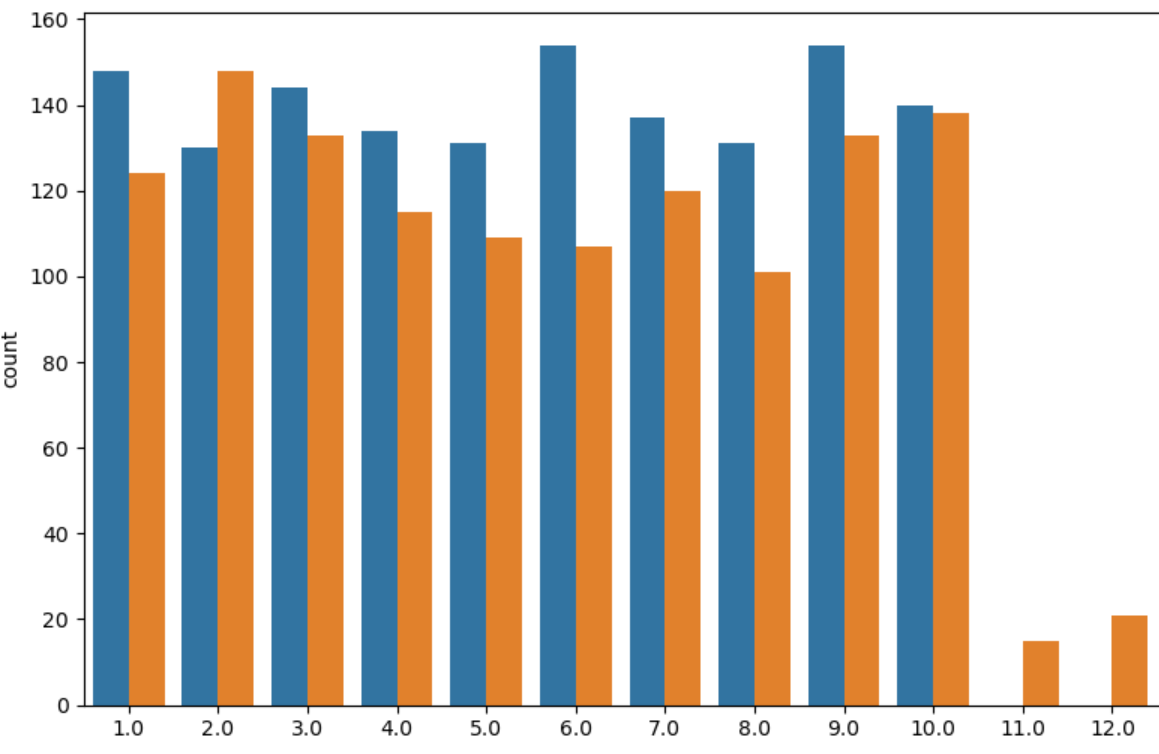

1~ 10회 제공까지는 제때 도착하지 못한 화물 있으나  
11 회 부터는 모두 제때 도착함  

- 09_11 10 까지의 비중이 데이터의 75% 차지하기에 75% 를 10으로 바꿔 보겠음  



#### .describe()   
count    3468.000000  
mean       13.269031   
std        16.070188  
min         1.000000  
25%         4.000000   
50%         7.000000   
75%        10.000000  
max        65.000000  

#### .value_counts()    
9.0     287  
2.0     278   
10.0    278  
3.0     277  
1.0     272  
       ...   
50.0     10  
18.0     10  
42.0      9  
26.0      8  
43.0      7  


### Weight_in_gms  
object  
화물 중량   

? = 446
? 제거후 중앙값 == 
Weight_in_gms          4189.0  



- 09_11 테스트에서 100씩 끊어봄

#### .describe()   
count     6999  
unique    3332  
top          ?  
freq       446  

#### .value_counts()    
?       446   
1817      8  
1367      8  
5709      7  
1861      7  
       ...   
4964      1  
5612      1  
2443      1  
2497      1  
1480      1  

## 정답 데이터    
### Reached.on.Time_Y.N  
int64
#### .describe()   
count    6999.000000  
mean        0.594656  
std         0.490993  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000  

#### .value_counts()    
1    4162  
0    2837  


# 새로 알게된 함수 정리



In [4]:
pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력

(train_ques['컬럼'] == 1).sum() # train['컬럼'] 컬럼에서 == 값 에 맞는 데이터 개수 구하기

#컬럼 이름 변경
train.rename(columns={'Warehouse_block ': 'Warehouse_block'}, inplace=True)


# 범주형 데이터만 뽑기
train.select_dtypes(include=['object'])


# 'Reached.on.Time_Y.N' 컬럼을 맨 위로 옮기기
corr_matrix = X_train.corr()
reordered_columns = ['Reached.on.Time_Y.N'] + [col for col in corr_matrix.columns if col != 'Reached.on.Time_Y.N']
corr_matrix = corr_matrix[reordered_columns]
corr_matrix

# ? 인 값의 개수 구하는법
(train['Product_importance'] == '?').sum()


# ? 인 값 제거
X_train_cleaned = X_train[X_train['Weight_in_gms'] != '?']


# 데이터 타입 변경
train['Weight_in_gms'] = train['Weight_in_gms'].astype('int64')
 


NameError: name 'pd' is not defined